In [273]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

### Perform EDA, create visualizations to explore data

In [308]:
# Import data using Sl_No as index key
df_data = pd.read_excel("Credit Card Customer Data.xlsx", index_col='Sl_No')
df_data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [275]:
df_data.shape

(660, 6)

In [276]:
df_data.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [277]:
df_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(6)
memory usage: 36.1 KB


In [278]:
# Checking for null values
df_data.isnull().any()

Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

###### Check for duplicate Customers

In [279]:
df_data["Customer Key"].nunique()

655

### Findings

###### 1) There are 5 duplicate customer keys.
###### 2) One strategy that can be taken is to drop these keys completely.
###### 3) The duplicate Customers being very less (5 rows) and this being a clusterng task, the duplicates will not significantly alter the results. Thus I am leaving the dataset as is assuming the duplicates are there because of some kind of human error.

### Univariate analysis

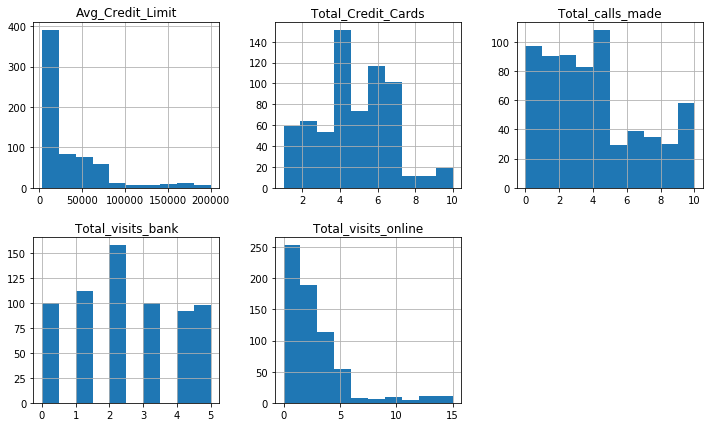

In [280]:
df_data.drop('Customer Key',axis=1).hist(figsize=(12,7),layout=(2,3));

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


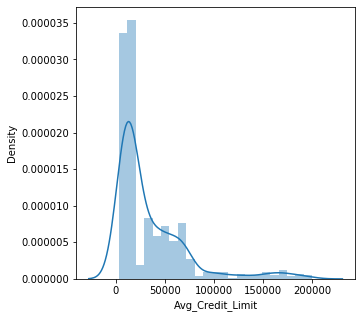

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


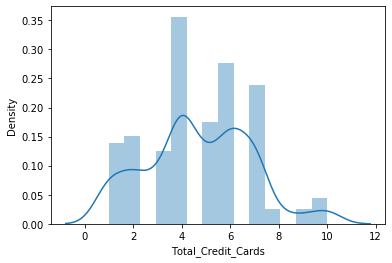

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


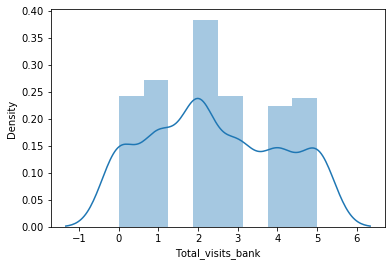

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


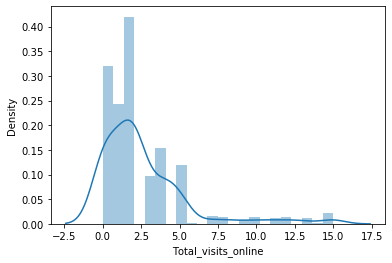

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


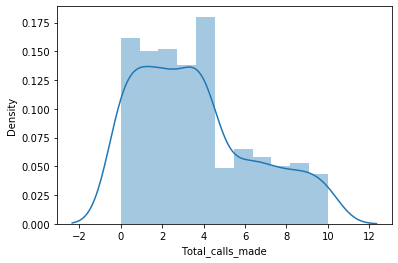

In [281]:
plt.figure(figsize=(5, 5));
for col in df_data.columns[1:]:
    print(sns.distplot(df_data[col]));
    plt.show();

### Findings

##### 1) Average credit card limit for all the people who use credit cards is low.
##### 2) Roughly a normal distribution on total number of credit cards, Total calls made and total visits to bank.
##### 3) Total online visits is right skewed with the majority of the distribution lying between 0 and 5

### Univariate analysis

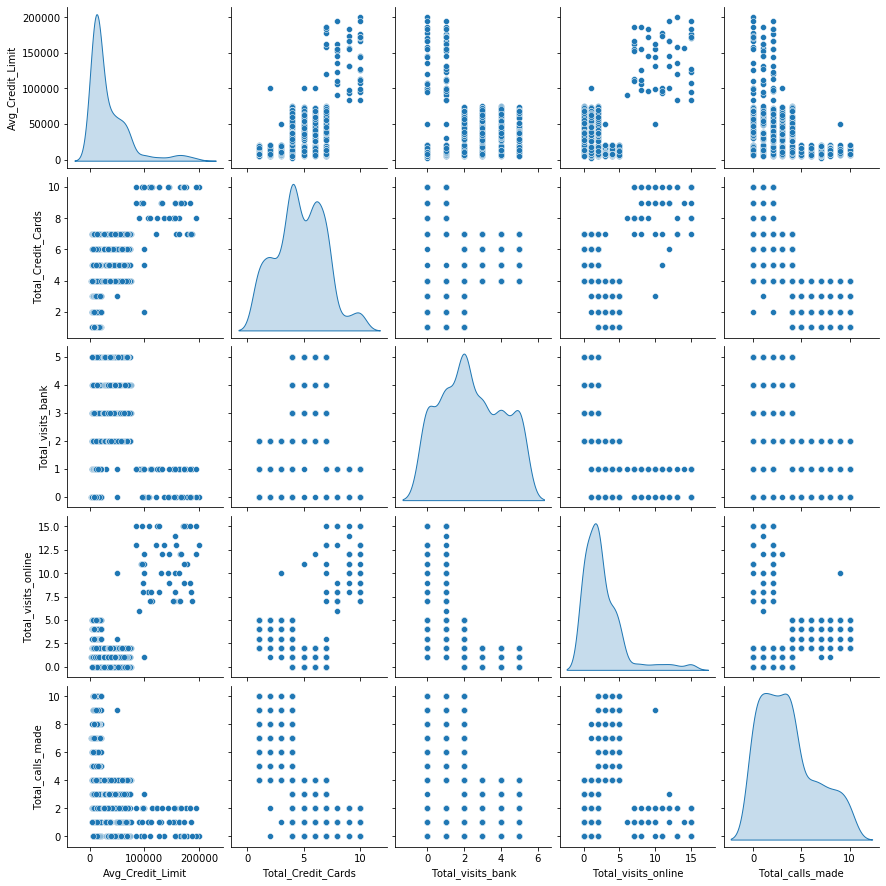

In [282]:
sns.pairplot(df_data.iloc[:,1:], diag_kind='kde');

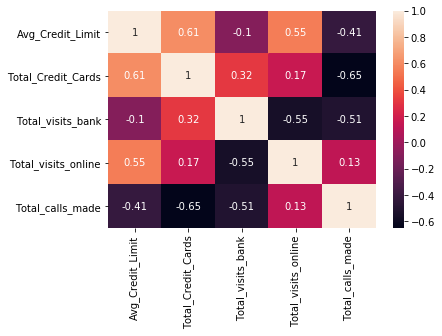

In [283]:
ax_map = sns.heatmap(df_data.iloc[:,1:].corr(), annot=True)
ax_map.set_ylim(5.0, 0)
plt.show()

#### Scaling the data as K-means and hierarchical clustering both as sensitive to scales

In [309]:
sc = StandardScaler();
df_scaled = sc.fit_transform(df_data.iloc[:,1:].astype(float));
df_scaled = pd.DataFrame(df_scaled,index=df_data.index, columns=df_data.columns[1:]);
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Execute K-means clustering use elbow plot and analyse clusters using boxplot

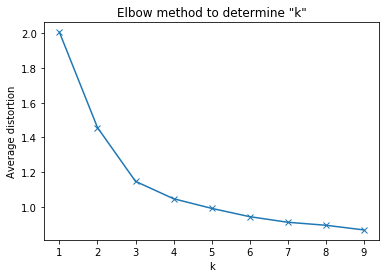

In [285]:
# Finding optimal value of k

meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(range(1, 10), meanDistortions, "x-")
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Elbow method to determine "k"');

#### Finding:
##### Optimal number of clusters is 3 according to the elbow method above.

In [310]:
# Applying KMeans clustering
model = KMeans(n_clusters=3)
model.fit(df_scaled)
predicted_vals = model.predict(df_scaled)

#### Silhouette score for K-means Clustering

In [311]:
labels = model.labels_
silhouette_score(df_scaled, labels, metric='euclidean')

0.5157182558881063

###### Silhouette score is best when it is 1 and the loswest score is -1.
###### * Score of 0.5157182558881063 represents fairly good clusters.

###### Adding predictions to unscaled data to get fruitful insights

In [312]:
df_data["K-means_preds"] = predicted_vals
df_scaled["K-means_preds"] = predicted_vals
df_data.groupby("K-means_preds").mean().iloc[:,1:]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K-means_preds,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [313]:
df_data.groupby("K-means_preds").median().iloc[:,1:]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K-means_preds,,,,,
0,31000.0,6.0,3.0,1.0,2.0
1,12000.0,2.0,1.0,4.0,7.0
2,145500.0,9.0,1.0,11.0,1.0


In [314]:
df_data.groupby("K-means_preds").count().iloc[:,1:]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K-means_preds,,,,,
0,386,386,386,386,386
1,224,224,224,224,224
2,50,50,50,50,50


###### Checking the mean and median to undestand what these groupings are
###### From the data of the mean and median above we can conclude the cluster names

###### I am using the lables accordingly below

In [317]:
df_infer_km = df_data.groupby('K-means_preds').mean();
df_infer_km.index = ['In person','Phone', 'Online'];
df_infer_km.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
In person,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
Phone,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
Online,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


##### From the above data and the boxplot below we can see following:
##### 1) Online users have the most average credit limit and highest number of credit cards. 
#####    This could perhaps be the young people who spend more and the bank has done a good job selling to these people.
##### 2) People who visit the bank in person are the second in avg credit limit and number of credit cards. 
#####    These could be older people who are more conventional and have adequate saving but are cautious about their savings.
##### 3) The least credit limit and least credit cards are held by people who call, 
#####    this could be the low income segment of bank who do not find the time to come to the bank or are not technology savvy.

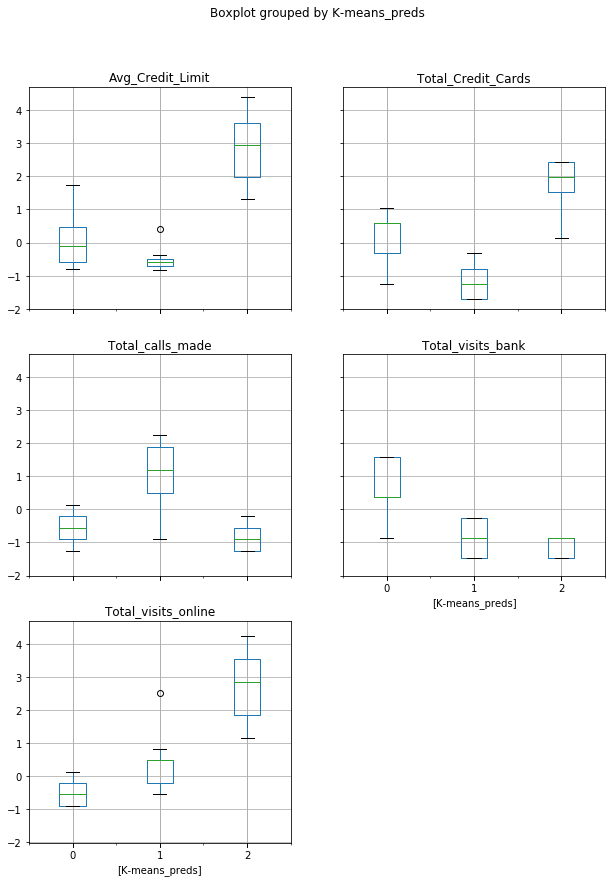

In [292]:
df_scaled.boxplot(by='K-means_preds', layout=(3,2), figsize=(10,14));

##### Dropping predicted clusters to prep for Hierarchical Clustering 

In [318]:
df_scaled.drop('K-means_preds', inplace=True, axis=1)

In [319]:
df_final = df_data.copy()
df_data.drop('K-means_preds', inplace=True, axis=1)

### Hierarchical Clustering

#### Evaluating the cophenetic coefficients for each linkage type and also some affinity/metric.
#### Note: Picking euclidean for the metric and average for linkage from the below results as it is the highest

In [295]:
links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
affs = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard']
cols = list(df_scaled.columns)

for aff in affs:
    for link in links:
        if link == 'ward' and aff != 'euclidean':
            pass
        elif link == 'centroid' and aff != 'euclidean':
            pass
        elif link == 'median' and aff != 'euclidean':
            pass
        else:
            Z = linkage(df_scaled[cols], metric=aff, method=link)
            c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
            if c > .75:
                print('affinity:',aff, ', link:',link,':', c)

affinity: braycurtis , link: single : 0.8502845518924395
affinity: canberra , link: single : 0.7566178713003985
affinity: chebyshev , link: complete : 0.8533474836336782
affinity: chebyshev , link: average : 0.8974159511838106
affinity: chebyshev , link: weighted : 0.8913624010768603
affinity: cityblock , link: complete : 0.8731477899179829
affinity: cityblock , link: average : 0.896329431104133
affinity: cityblock , link: weighted : 0.8825520731498188


C:\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:1280: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


affinity: euclidean , link: complete : 0.8599730607972423
affinity: euclidean , link: average : 0.8977080867389372
affinity: euclidean , link: weighted : 0.8861746814895477
affinity: euclidean , link: centroid : 0.8939385846326323
affinity: euclidean , link: median : 0.8893799537016724


#### Using Dendogram to cluster data

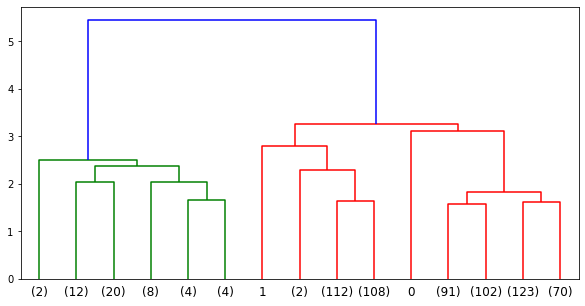

In [296]:
Z = linkage(df_scaled[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
plt.figure(figsize=(10, 5))

dendrogram(Z, p=15, truncate_mode='lastp')
plt.show()

##### The dendogram shows there are 2 distinct clusters. But this could be argued and 3 clusters is a posibility as well. More than three does not make sense as the data as number of records per cluster is very low for few clustes then. 
##### Also the cluster on the left (in green) contains 50 records which is online users from k-means and the one on the right (in red) contains 610 records (This is further seperated into 387 and 223 records which is very similar to k-means grouping).

##### I am using 3 clusters as this would be good to compare with k-means and given the dimensions in the data has Total_visits_bank,  Total_visits_online and Total_calls_made I feel it is logical to have 3 clusters.

In [320]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_scaled)
preds=model.labels_
df_data['hc'] = preds # Adding prediction to un-scaled data
df_scaled['hc'] = preds # Adding prediction to scaled data
df_final['hc'] = preds
df_data.groupby('hc').mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hc,,,,,,
0,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
2,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408


In [321]:
df_infer_dendo = df_data.groupby('hc').mean()
df_infer_dendo.index = ['In person', 'Online', 'Phone']
df_infer_dendo

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
In person,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168
Online,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
Phone,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408


#### The grouping results above shows very similar results as K-means clusturing

#### Silhouette score for Hierarchical Clustering

In [322]:
labels = model.labels_
silhouette_score(df_scaled, labels, metric='euclidean')

0.590990473596407

##### From the above data and the boxplot below we can see the same observations as we saw in K-mean clustering:
##### 1) Online users have the most average credit limit and highest number of credit cards. 
#####    This could perhaps be the young people who spend more and the bank has done a good job selling to these people.
##### 2) People who visit the bank in person are the second in avg credit limit and number of credit cards. 
#####    These could be older people who are more conventional and have adequate saving but are cautious about their savings.
##### 3) The least credit limit and least credit cards are held by people who call, 
#####    this could be the low income segment of bank who do not find the time to come to the bank or are not technology savvy.

###### * Score of 0.590990473596407 represents fairly good clusters. And the clusters are slightly better than K-means clustering

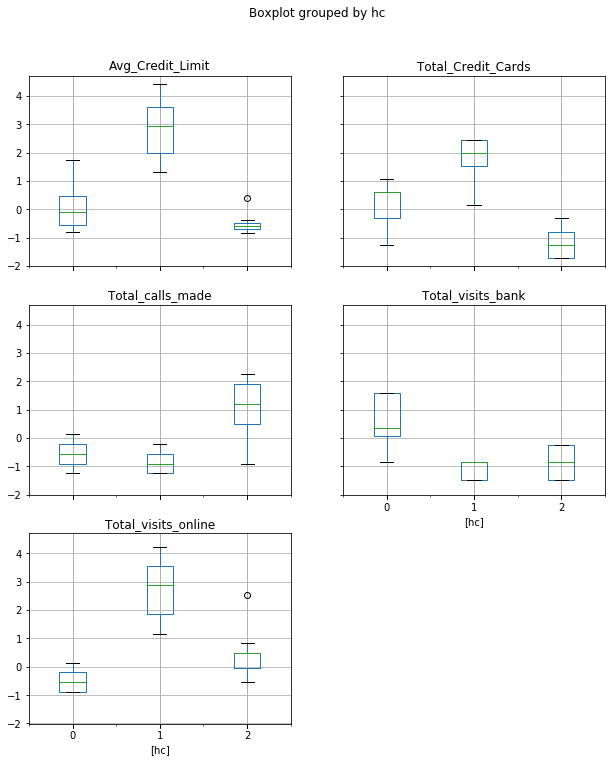

In [300]:
df_scaled.boxplot(by='hc', layout=(3,2), figsize=(10,12));

##### Compare K-means clusters with Hierarchical clusters

In [323]:
df_infer_km # K-means matrix

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
In person,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
Phone,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
Online,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


In [324]:
df_infer_dendo # Hierarchical matrix

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
In person,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168
Online,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000
Phone,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408


#### Both clustering techniques almost perform similarly. 
#### With silhouette score we have seen that the clusters formed by hierarchical clustering are better formed but only marginally.

### Key Questions

In [303]:
# Arguably, there are three distinct categories of customers:
# 1) In-person users: prefer to handle bank transactions in person. They have second most Credit limit and they also prefer making calls to the bank and trust human interactions rather than online transactions.
# 2) Phone users: prefer verbally handling transactions remotely. Have lowest Credit limit.
# 3) Online users: prefer digital transactions. They also have the most credit cards and the highest available credit.

In [304]:
# According to the groups contact methods can be decided, example -
# In-person users - Contact with post/call
# Phone users - Can be contacted over phone
# Online users - Send emails.

# Strategies for upselling can follow this template to contact these groups

In [305]:
# As explained earlier:

# From the above data and the boxplot below we can see the same observations as we saw in K-mean clustering:
# 1) Online users have the most average credit limit and highest number of credit cards. 
#    This could perhaps be the young people who spend more and the bank has done a good job selling to these people.
# 2) People who visit the bank in person are the second in avg credit limit and number of credit cards. 
#    These could be older people who are more conventional and have adequate saving but are cautious about their savings.
# 3) The least credit limit and least credit cards are held by people who call, 
#    this could be the low income segment of bank who do not find the time to come to the bank or are not technology savvy.

In [306]:
# Some upselling strategies:

# The duplicates that we had encountered earlier in the exercise could be people who switched groups, lets check
# See below there are 5 duplicate Customer Keys, and the you can see a transition between groups in 3 case.
# Further patterns for these customers can we studied, 
# also what marketing was done that initiated these changes to the more desirable cluster can be looked into.

In [325]:
df_compare = df_final.groupby('Customer Key').count()

for k in list(df_compare.loc[df_compare.Total_calls_made >=2].index):
    display(df_final.loc[df_final['Customer Key'] == k])

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K-means_preds,hc
Sl_No,,,,,,,,
49,37252,6000,4,0,2,8,1,2
433,37252,59000,6,2,1,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K-means_preds,hc
Sl_No,,,,,,,,
5,47437,100000,6,0,12,3,2,1
333,47437,17000,7,3,1,0,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K-means_preds,hc
Sl_No,,,,,,,,
412,50706,44000,4,5,0,2,0,0
542,50706,60000,7,5,2,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K-means_preds,hc
Sl_No,,,,,,,,
392,96929,13000,4,5,0,0,0,0
399,96929,67000,6,2,2,2,0,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K-means_preds,hc
Sl_No,,,,,,,,
105,97935,17000,2,1,2,10,1,2
633,97935,187000,7,1,7,0,2,1
